<a href="https://colab.research.google.com/github/lmvu103/Water-source/blob/main/Water_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show>

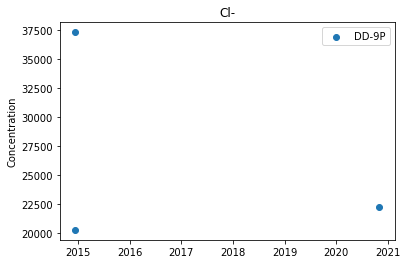

In [ ]:
#1. Plot data by wells
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset='/content/Dataset.csv'
df=pd.read_csv(dataset)


df['SampleDate'] = pd.to_datetime(df['SampleDate'],format='%m/%d/%Y')
#Plot concentration follow wells
#print(df.loc[1])
data1p=(df[df['Well']=='DD-1P'])
data2p=(df[df['Well']=='DD-2P'])
data3p=(df[df['Well']=='DD-3P'])
data4p=(df[df['Well']=='DD-4P'])
data6p=(df[df['Well']=='DD-6P'])
data7p=(df[df['Well']=='DD-7P'])
data9p=(df[df['Well']=='DD-9P'])

#plt.scatter(data1p['SampleDate'],data1p['Cl-'],label='DD-1P')
#plt.scatter(data2p['SampleDate'],data2p['Cl-'],label='DD-2P')
#plt.scatter(data3p['SampleDate'],data3p['Cl-'],label='DD-3P')
#plt.scatter(data4p['SampleDate'],data4p['Cl-'],label='DD-4P')
#plt.scatter(data6p['SampleDate'],data6p['Cl-'],label='DD-6P')
#plt.scatter(data7p['SampleDate'],data7p['Cl-'],label='DD-7P')
plt.scatter(data9p['SampleDate'],data9p['Cl-'],label='DD-9P')
plt.title('Cl-')
plt.ylabel("Concentration")
plt.legend()
plt.show

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

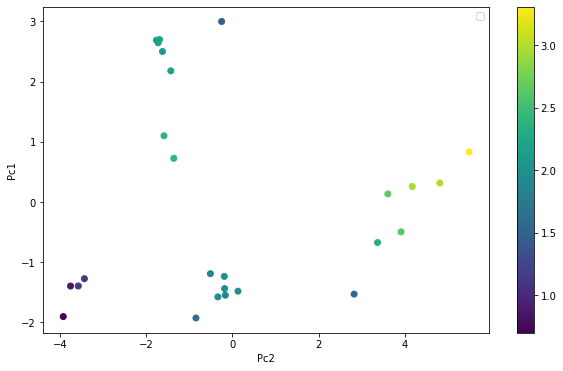

In [ ]:
#2. Classification by PCA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset='/content/Dataset_ddmm.csv'
df=pd.read_csv(dataset)

df=df.iloc[:,4:]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(df)

# Thực hiện transform scale
w_data = scaler.transform(df)

from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 2
my_pca = PCA (n_components = 2 )

# Fit vào data
my_pca.fit(w_data)

# Thực hiện transform 
w_df = my_pca.transform(w_data)


plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = w_df[:, 0]
# Thành phần comp số 2
pca_2 = w_df[:, 1]

# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2, c = df['LSI'])
#plt.title('Cl-')
plt.ylabel("Pc1")
plt.xlabel("Pc2")
plt.legend()
plt.colorbar();
plt.show

In [ ]:
#3. Data input
dataset='/content/Dataset_ddmm.csv'
df=pd.read_csv(dataset)
df.describe()

,WC,pH,Na+,K+,Ca2+,Mg2+,Fe,Cl-,HCO3-,CO32-,OH-,SO42-,LSI,RSI,PSI
count,0.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,NaN,7.270769,9397.500000,209.134615,2805.230769,466.503846,1.853077,19726.615385,461.769231,17.703846,0.026923,207.507692,2.029615,3.210769,2.164615
std,NaN,0.854606,2325.755916,50.867718,1289.627243,443.138140,1.130482,1210.880674,213.542185,48.104449,0.045234,285.153331,0.635519,0.525600,0.819054
min,NaN,5.560000,6924.000000,144.000000,914.000000,132.000000,0.100000,18024.000000,175.000000,0.000000,0.000000,36.400000,0.700000,2.190000,1.190000
25%,NaN,7.125000,8154.500000,172.175000,1406.250000,153.500000,0.665000,18997.000000,286.750000,0.000000,0.000000,70.625000,1.697500,2.807500,1.332500
50%,NaN,7.245000,8543.500000,184.000000,3194.000000,310.250000,2.000000,19541.000000,369.000000,0.000000,0.000000,93.000000,2.045000,3.310000,2.355000
75%,NaN,7.367500,11562.750000,237.750000,3505.000000,438.350000,2.705000,20521.000000,619.000000,0.075000,0.075000,133.350000,2.395000,3.532500,2.760000
max,NaN,8.810000,17086.000000,324.000000,4712.000000,1816.000000,3.460000,22217.000000,824.000000,200.000000,0.100000,1304.000000,3.310000,4.220000,3.650000


In [ ]:
#4. Plit data train
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


dataset='/content/Dataset_ddmm.csv'
df=pd.read_csv(dataset)

from sklearn.model_selection import train_test_split
predictors = ['pH', 'Na+', 'K+', 'Ca2+','Mg2+','Fe','Cl-', 'CO32-','SO42-','CO32-']
X = df[predictors]
y = df['LSI']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1)

Text(0, 0.5, 'LSI_data')

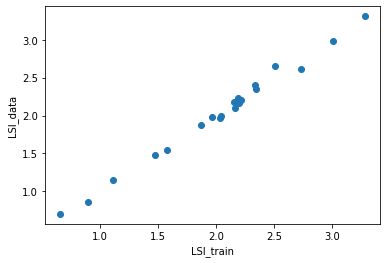

In [ ]:
# Importing ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing preprocessing functionalities
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Importing metrics
from sklearn.metrics import mean_squared_error


pipemodel = Pipeline([
    ('scl', StandardScaler()),
    ('reg', LinearRegression())
])

pipemodel.fit(X_train, y_train)


scale_test = pipemodel.predict(X_test)
scale_train = pipemodel.predict(X_train)

plt.scatter(scale_train, y_train)
plt.xlabel('LSI_train')
plt.ylabel('LSI_data')

Text(0, 0.5, 'LSI_data')

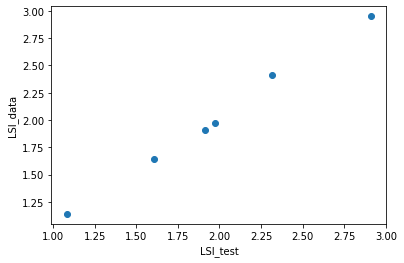

In [ ]:
plt.scatter(scale_test, y_test)
plt.xlabel('LSI_test')
plt.ylabel('LSI_data')

Running LinearRegression, Decision Trees and Random Forest

In [ ]:
#4. Plit data train
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


dataset='/content/Dataset_ddmm.csv'
df=pd.read_csv(dataset)

from sklearn.model_selection import train_test_split
predictors = ['pH', 'Na+', 'K+', 'Ca2+','Mg2+','Fe','Cl-', 'HCO3- ','SO42-','CO32-']
X = df[predictors]
y = df['LSI']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1)

In [ ]:
def genericml(model):
    pipemodel = Pipeline([
        ('scl', StandardScaler()),
        ('reg', model)
    ])
    pipemodel.fit(X_train, y_train)
    print(f'Training accuracy {pipemodel.score(X_train, y_train)}')
    print(f'Test accuracy {pipemodel.score(X_test, y_test)}')
    scale_test = pipemodel.predict(X_test)
    scale_train = pipemodel.predict(X_train)
    plt.scatter(scale_train, y_train)
    plt.xlabel('LSI_train')
    plt.ylabel('LSI_data')
    
    return pipemodel

def plotter(model, modelname):
#wellnames = df['Well'].unique()
  fig, ax = plt.subplots(4,2, figsize=(20,20))
  row = [0, 0, 1, 1, 2, 2, 3, 3]
  col = [0, 1, 0, 1, 0, 1, 0, 1]
  df['modelname'] = model.predict(df[predictors])
  for i, well in enumerate(wellnames):
    dfpred = df[df['Well']==well]
    #print(dfpred.shape)
    #plt.figure(figsize=(15,8))
    ax[row[i], col[i]].scatter(dfpred['Sample date'], dfpred['LSI'])
    ax[row[i], col[i]].set_title(well)
    ax[row[i], col[i]].set_ylabel('LSI')
    ax[row[i], col[i]].plot(dfpred['Sample date'], dfpred['modelname'], color='green')
    #plt.plot(dfpred['dates'], dfpred['bhp_Random_Forest'], color='green')
    plt.xlabel('LSI_pre')
    plt.ylabel('LSI_data')
plt.show();

Training accuracy 0.998495710098315
Test accuracy 0.9953721068897758


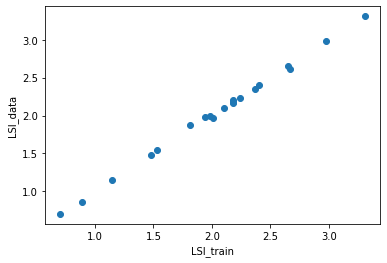

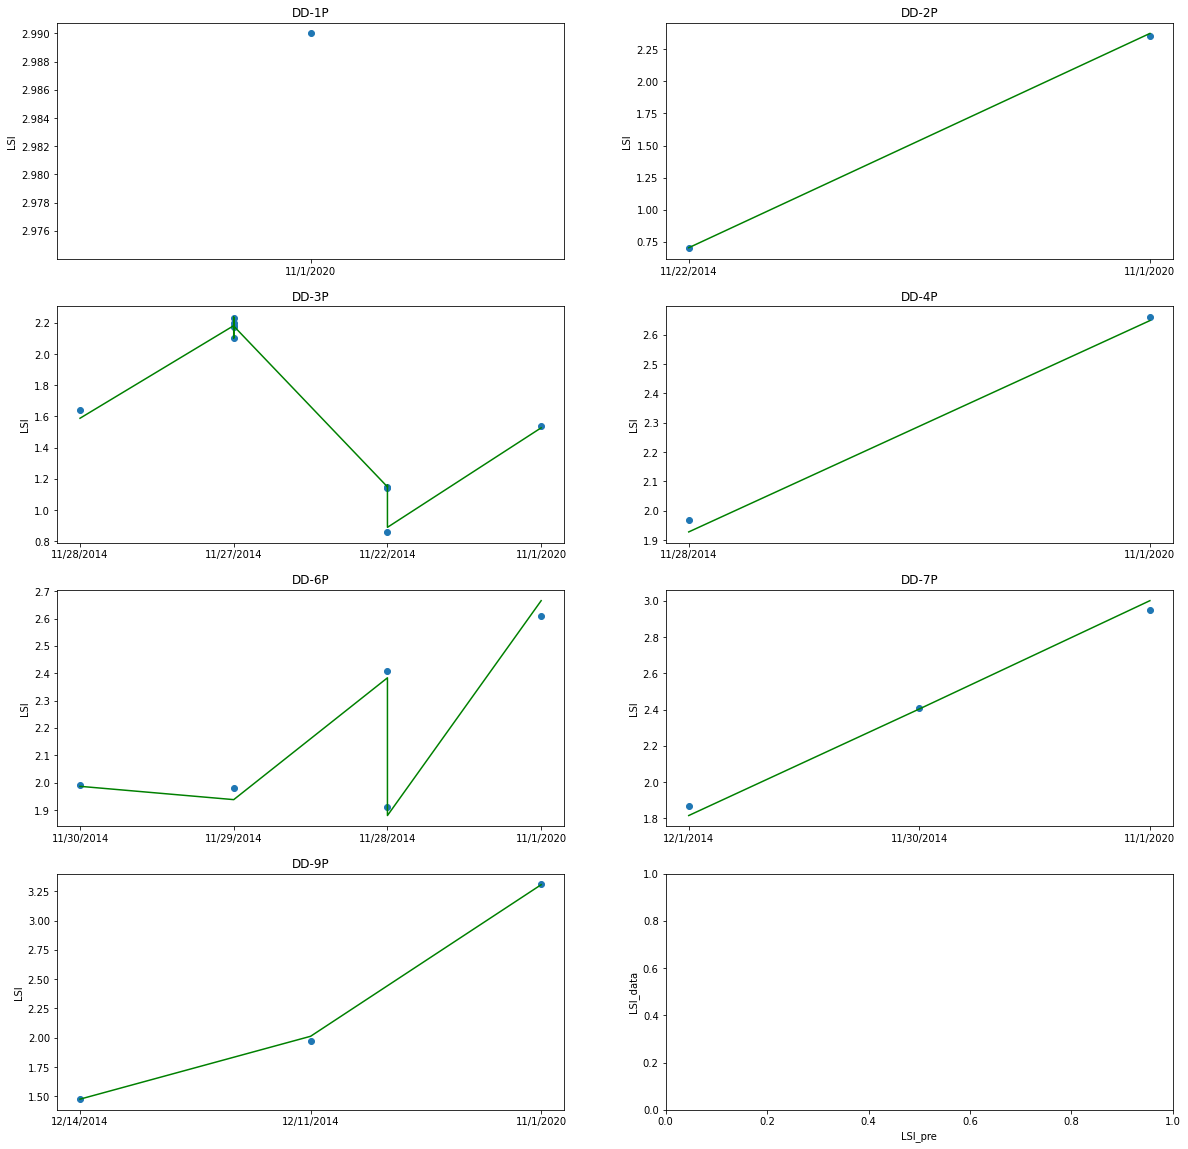

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

# Importing preprocessing functionalities
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Importing metrics
from sklearn.metrics import mean_squared_error


dataset='/content/Dataset_ddmm.csv'
df=pd.read_csv(dataset)

wellnames = df['Well'].unique()
# Continoeus data
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
ln= LinearRegression()
svr = SVR(kernel = 'rbf')
kn = KNeighborsRegressor()
# Discret data
gs = GaussianNB()
svm = GaussianNB()

dtree_reg = genericml(ln)

plotter(dtree_reg, "LSI_2")

Running ANN





In [ ]:
df.head()

,Reservoir,Well,Sample date,WC,pH,Na+,K+,Ca2+,Mg2+,Fe,Cl-,HCO3-,CO32-,OH-,SO42-,LSI,RSI,PSI
0,BII220,DD-1P,11/1/2020,NaN,8.64,11726,171.6,1045,424.4,0.10,21589,220,100.0,0.1,489.0,2.99,2.66,3.04
1,BII220,DD-2P,11/22/2014,NaN,5.56,7112,188.0,4524,140.0,3.34,18412,601,0.0,0.0,40.1,0.70,4.15,1.23
2,BII220,DD-2P,11/1/2020,NaN,8.11,11568,167.8,1051,412.1,0.20,20965,330,0.1,0.1,463.5,2.35,3.40,3.41
3,BII220,DD-3P,11/28/2014,NaN,6.86,8332,144.0,3365,136.0,1.90,19122,354,0.0,0.0,114.0,1.64,3.57,2.28
4,BII220,DD-3P,11/27/2014,NaN,7.24,8314,256.0,2511,1123.0,2.76,19112,712,0.0,0.0,98.0,2.20,2.84,1.49


In [ ]:
df_scaled

In [ ]:
# running an ANN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

dataset='/content/Dataset_ddmm.csv'

df=pd.read_csv(dataset)


from sklearn.model_selection import train_test_split
predictors = ['pH', 'Na+', 'K+', 'Ca2+','Mg2+','Fe','Cl-', 'HCO3- ','SO42-','CO32-']
X = df[predictors]
y = df['LSI']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = Sequential()
model.add(Dense(32, input_shape = (len(predictors),), activation = 'sigmoid'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
sgd = optimizers.Adam(lr = 0.001)

model.compile(optimizer = sgd, loss = 'mse', metrics=['mae'])

train_model=model.fit(X_train, y_train, batch_size = 1, epochs = 100, verbose = 1,validation_data=(X_test, y_test))



In [ ]:
print(w_data)

In [ ]:
df['LSI_ANN'] = model.predict(df[predictors])


# Q. Evalutae the model
## Start code here
model.evaluate(X_train, y_train)

#Plot Loss
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

#Plot Accuracy
#plt.plot(train_model.history['accuracy'])
#plt.plot(train_model.history['val_accuracy'])
#plt.title('Model Accuracy')
#plt.ylabel('Acc')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'], loc='lower right')

wellnames = df['Well'].unique()

fig, ax = plt.subplots(4,2, figsize=(20,20))
row = [0, 0, 1, 1, 2, 2,3,3]
col = [0, 1, 0, 1, 0,1,0,1]
df['LSI_2'] = model.predict(df[predictors])
for i, well in enumerate(wellnames):
    dfpred = df[df['Well']==well]
    #print(dfpred.shape)
    #plt.figure(figsize=(15,8))
    ax[row[i], col[i]].scatter(dfpred['Sample date'], dfpred['LSI'])
    ax[row[i], col[i]].plot(dfpred['Sample date'], dfpred['LSI_2'], color='green')
    ax[row[i], col[i]].set_title(well)
    ax[row[i], col[i]].set_ylabel('LSI')
    ax[row[i], col[i]].legend(['Train', 'Val'], loc='lower right')
    #plt.plot(dfpred['dates'], dfpred['bhp_Random_Forest'], color='green')
plt.show();